In [1]:
from cobaya.model import get_model
from cobaya.run import run
import yaml
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
import baccoemu
import pyccl as ccl

2025-04-14 18:04:49.795343: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-14 18:04:49.795979: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-14 18:04:49.798263: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-14 18:04:49.805160: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744650289.816630   56317 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744650289.81

In [2]:
# Read in the yaml file
config_fn = 'test_wisc.yaml'
with open(config_fn, "r") as fin:
    info = yaml.load(fin, Loader=yaml.FullLoader)
model = get_model(info)
p0 = {}
for p in info['params']:
     if isinstance(info['params'][p], dict):
         if 'ref' in info['params'][p]:
             p0[p] = info['params'][p]['ref']['loc']
#os.system('mkdir -p ' + info['output'])
print(p0)
loglikes, derived = model.loglikes(p0)
print("chi2 = ", -2 * loglikes[0])

[model] *WARNING* Ignored blocks/options: ['force', 'sampler', 'output']
Loading l-bias lpt emulator...
L-bias lpt emulator loaded in memory.
Loading smeared bao emulator...
Smeared bao emulator loaded in memory.
Loading non-linear l-bias emulator...
Nonlinear l-bias emulator loaded in memory.
Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...
Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...
Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.
{'sigma8': 0.81, 'Omega_c': 0.27}
chi2 =  87.53308523257476


In [3]:
info['theory']['cl_like.Pk']['bias_model'] = 'BaccoHEFT'
model = get_model(info)
p0 = {}
for p in info['params']:
     if isinstance(info['params'][p], dict):
         if 'ref' in info['params'][p]:
             p0[p] = info['params'][p]['ref']['loc']
#os.system('mkdir -p ' + info['output'])
print(p0)
loglikes, derived = model.loglikes(p0)
print("chi2 = ", -2 * loglikes[0])

[model] *WARNING* Ignored blocks/options: ['force', 'sampler', 'output']
Loading l-bias lpt emulator...


/home/damonge/miniconda3/envs/clean/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.24.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/damonge/miniconda3/envs/clean/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.24.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/damonge/miniconda3/envs/clean/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer

L-bias lpt emulator loaded in memory.
Loading smeared bao emulator...
Smeared bao emulator loaded in memory.
Loading non-linear l-bias emulator...


/home/damonge/miniconda3/envs/clean/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/damonge/miniconda3/envs/clean/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/damonge/miniconda3/envs/clean/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 w

Nonlinear l-bias emulator loaded in memory.
Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...
Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...
Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.
{'sigma8': 0.81, 'Omega_c': 0.27}
chi2 =  89.1441449955305


In [4]:
lbias = baccoemu.Lbias_expansion()
mpk = baccoemu.Matter_powerspectrum()

Loading l-bias lpt emulator...


/home/damonge/miniconda3/envs/clean/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.24.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/damonge/miniconda3/envs/clean/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.24.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/damonge/miniconda3/envs/clean/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer

L-bias lpt emulator loaded in memory.
Loading smeared bao emulator...
Smeared bao emulator loaded in memory.
Loading non-linear l-bias emulator...


/home/damonge/miniconda3/envs/clean/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/damonge/miniconda3/envs/clean/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Nonlinear l-bias emulator loaded in memory.
Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...
Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...
Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/home/damonge/miniconda3/envs/clean/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/damonge/miniconda3/envs/clean/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/damonge/miniconda3/envs/clean/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.

In [5]:
z_s = np.linspace(0, 0.5, 10)
a_s = 1/(1+z_s)
nk_ccl = 64
k_ccl = np.geomspace(1E-3, 10, nk_ccl)

dx_par = {'omega_cold': 0.01,
          'omega_baryon': 0.01,
          'sigma8_cold': 0.01,
          'ns': 0.01,
          'hubble': 0.01,
          'neutrino_mass': 0.01,
          'w0': 0.01,
          'wa': 0.01}

lbias_bounds = dict(zip(lbias.emulator['nonlinear']['keys'],
                        lbias.emulator['nonlinear']['bounds'])).copy()

kh_bacco = lbias.emulator['nonlinear']['k']    


inds = {'mm': 0,
        'md1': 1,
        'md2': 2,
        'ms2': 3,
        'mk2': 4,
        'd1d1': 5,
        'd1d2': 6,
        'd1s2': 7,
        'd1k2': 8,
        'd2d2': 9,
        'd2s2': 10,
        'd2k2': 11,
        's2s2': 12,
        's2k2': 13,
        'k2k2': 14}
pfac = {'mm': 1.0,
        'md1': 1.0,
        'md2': 0.5,
        'ms2': 0.5,
        'mk2': 1.0,
        'd1d1': 1.0,
        'd1d2': 0.5,
        'd1s2': 0.5,
        'd1k2': 1.0,
        'd2d2': 0.25,
        'd2s2': 0.25,
        'd2k2': 0.5,
        's2s2': 0.25,
        's2k2': 0.5,
        'k2k2': 1.0}
inc_der = {'mm': True,
           'md1': True,
           'md2': False,
           'ms2': False,
           'mk2': False,
           'd1d1': True,
           'd1d2': False,
           'd1s2': False,
           'd1k2': False,
           'd2d2': True,
           'd2s2': False,
           'd2k2': False,
           's2s2': True,
           's2k2': False,
           'k2k2': True}
der_factor = np.ones(15, dtype=bool)
for k, v in inc_der.items():
    der_factor[inds[k]] = v


def ccl2bacco(cosmo):
    cospar = {
        'omega_cold': cosmo['Omega_c'] + cosmo['Omega_b'],
        'omega_baryon': cosmo['Omega_b'],
        'ns': cosmo['n_s'],
        'hubble': cosmo['h'],
        'neutrino_mass': np.sum(cosmo['m_nu']),
        'w0': cosmo['w0'],
        'wa': cosmo['wa']}

    if np.isnan(cosmo['A_s']):
        s8tot = cosmo.sigma8()
        A_s_fid = 2.1E-9
        s8tot_fid = mpk.get_sigma8(cold=False, A_s=A_s_fid, **cospar)
        A_s = (s8tot / s8tot_fid)**2 * A_s_fid
        s8cold = mpk.get_sigma8(cold=True, A_s=A_s, **cospar)
        cospar['sigma8_cold'] = s8cold
    else:
        cospar['A_s'] = cosmo['A_s']
    return cospar

def bacco2ccl(cospar, tf=None):
    Omega_b = cospar['omega_baryon']
    Omega_m = cospar['omega_cold']
    Omega_c = Omega_m - Omega_b
    n_s = cospar['ns']
    h = cospar['hubble']
    m_nu = cospar['neutrino_mass']
    w0 = cospar['w0']
    wa = cospar['wa']

    A_s = cospar.get('A_s', None)
    sigma8 = None
    if A_s is None:
        s8cold = cospar['sigma8_cold']
        cpar = cospar.copy()
        cpar.pop('sigma8_cold')
        A_s_fid = 2.1E-9
        s8cold_fid = mpk.get_sigma8(cold=True, A_s=A_s_fid, **cpar)
        s8tot_fid = mpk.get_sigma8(cold=False, A_s=A_s_fid, **cpar)
        sigma8 = s8cold * s8tot_fid / s8cold_fid
    transfer = 'boltzmann_camb' if tf is None else tf

    cosmo = ccl.Cosmology(Omega_c=Omega_c, Omega_b=Omega_b,
                          h=h, m_nu=m_nu, w0=w0, wa=wa,
                          sigma8=sigma8, A_s=A_s, n_s=n_s,
                          transfer_function=transfer)
    return cosmo

def bacco_pars_a(pars, a):
    combined_pars = {}
    for key in pars.keys():
        combined_pars[key] = np.full((len(a)), pars[key])
    combined_pars['expfactor'] = a
    return combined_pars

def get_out_of_bounds(cospar):
    in_bounds = {}
    par_0 = {}
    for par, val in cospar.items():
        val0, valf = lbias_bounds[par]
        in_bounds[par] = (val >= val0) & (val <= valf)
        if not in_bounds[par]:
            if val < val0:
                par_0[par] = val0+dx_par[par]
            else:
                par_0[par] = valf-dx_par[par]
        else:
            par_0[par] = val
    return in_bounds, par_0

def get_lbias_pks_exact(cospar, mm_only=False):
    cosmo = bacco2ccl(cospar, tf='eisenstein_hu')
    h = cosmo['h']

    k_ccl = kh_bacco * h
    pk_mm = np.array([ccl.nonlin_matter_power(cosmo, k_ccl, a) for a in a_s])*h**3
    if mm_only:
        return pk_mm

    cospar_and_a = bacco_pars_a(cospar, a_s)
    pks = np.array(lbias.get_nonlinear_pnn(**cospar_and_a)[1])

    return pk_mm, pks

def get_ccl_pks_from_bacco_pks(cosmo, pks):
    if pks.ndim == 2:  # Check if this is a single power spectrum
        pks = np.array([pks])

    npks, nas, nks = pks.shape
    assert nks == len(kh_bacco)
    assert nas == len(a_s)
    pks = pks.reshape([npks*nas, nks])

    h = cosmo['h']
    kh_ccl = k_ccl / h
    klo = kh_ccl < kh_bacco[0]
    khi = kh_ccl > kh_bacco[-1]
    kmd = ~(klo + khi)

    pks_out = np.zeros([npks*nas, nk_ccl])
    # Interpolate within range
    pks_out[:, kmd] = interp1d(np.log(kh_bacco), pks)(np.log(kh_ccl[kmd]))

    if np.any(klo) or np.any(khi):
        pkas = np.fabs(pks)

    if np.any(khi):
        # Log-extrapolate at high-k
        # Calculate logarithmic slope at high-k
        slopes = np.log(pkas[:, -2]/pkas[:, -1])/np.log(kh_bacco[-2]/kh_bacco[-1])
        # Set slope to zero if pk changes sign
        sign_swap = pks[:, -1] * pks[:, -2] < 0
        slopes[sign_swap] = 0
        slopes[slopes > 0] = 0
        # Extrapolate
        pk_extrap = (pks[:, -1])[:, None]*((kh_ccl[khi]/kh_bacco[-1])[None, :]**slopes[:, None])
        pks_out[:, khi] = pk_extrap
    
    if np.any(klo):
        # Log-extrapolate at low-k
        # Calculate logarithmic slope at low-k
        slopes = np.log(pkas[:, 0]/pkas[:, 1])/np.log(kh_bacco[0]/kh_bacco[1])
        # Set slope to zero if pk changes sign
        sign_swap = pks[:, 0] * pks[:, 1] < 0
        slopes[sign_swap] = 0
        slopes[slopes < 0] = 0
        # Extrapolate
        pk_extrap = (pks[:, 0])[:, None]*((kh_ccl[klo]/kh_bacco[0])[None, :]**slopes[:, None])
        pks_out[:, klo] = pk_extrap

    pks_out = pks_out.reshape([npks, nas, nk_ccl])
    pks = pks.reshape([npks, nas, nks])

    # CCL units
    pks_out *= 1/h**3

    return pks_out.squeeze()


def get_lbias_pks(cosmo):
    cospar = ccl2bacco(cosmo)
    in_bounds, cospar_0 = get_out_of_bounds(cospar)

    pk_mm_0, pks_0 = get_lbias_pks_exact(cospar_0)

    # Within bounds, no parameter extrapolation
    if np.all(list(in_bounds.values())):
        return get_ccl_pks_from_bacco_pks(cosmo, pks_0)

    # Sign
    sign = np.sign(pks_0)
    lx = np.log(np.fabs(pks_0)/pk_mm_0)
    x = pks_0 / pk_mm_0

    # Controlled parameter extrapolation
    for par, in_bound in in_bounds.items():
        if in_bound:
            continue
        print(f"Extrapolating {par}, {cospar[par]}, {cospar_0[par]}")

        cpar = cospar_0.copy()
        cpar[par] += dx_par[par]
        pk_mm_p, pks_p = get_lbias_pks_exact(cpar)
        lxp = np.log(np.fabs(pks_p)/pk_mm_p)
        xp = pks_p / pk_mm_p

        cpar = cospar_0.copy()
        cpar[par] -= dx_par[par]
        pk_mm_m, pks_m = get_lbias_pks_exact(cpar)
        lxm = np.log(np.fabs(pks_m)/pk_mm_m)
        xm = pks_m / pk_mm_m

        dlx_dp = (lxp-lxm)/(2*dx_par[par])
        dx_dp = (xp-xm)/(2*dx_par[par])

        lx += dlx_dp * (cospar[par] - cospar_0[par])
        x += dx_dp * (cospar[par] - cospar_0[par])

    pk_mm = get_lbias_pks_exact(cospar, mm_only=True)
    pks = pk_mm * (sign*np.exp(lx)*der_factor[:, None, None] +
                   x * (~(der_factor[:, None, None])))

    return get_ccl_pks_from_bacco_pks(cosmo, pks)

In [6]:
def get_bounds():
    bounds = {}
    for i, k in enumerate(lbias.emulator['nonlinear']['keys']):
        b = lbias.emulator['nonlinear']['bounds'][i]
        bounds[k] = [b[0], b[1]]
    return bounds

def gal_b2L_b1L(b1L):
    return 0.01677 * b1L**3 - 0.005116 * b1L**2 + 0.4279 * b1L - 0.1635

def gal_bs2L_b1L(b1L):
    return -0.3605 * b1L**3 + 0.5649 * b1L**2 - 0.1412 * b1L - 0.01318

def gal_blL_b1L(b1L):
    return 0.2298 * b1L**3 - 2.096 * b1L**2 + 0.7816 * b1L - 0.1545

def combine_pk(b1, pk_temp):
    b2 = gal_b2L_b1L(b1)
    bs = gal_bs2L_b1L(b1)
    bk = gal_blL_b1L(b1)
    bs = {'m': 1, 'd1': b1, 'd2': b2, 's2': bs, 'k2': bk}
    operators = ['m', 'd1', 'd2', 's2', 'k2']

    pk_out = np.zeros_like(pk_temp[0])
    for i1, o1 in enumerate(operators):
        for o2 in operators[i1:]:
            pair = f'{o1}{o2}'
            f = pfac[pair]
            ind = inds[pair]
            pk = pk_temp[ind]
            pk_out += bs[o1]*bs[o2]*pk
    return pk_out

Extrapolating sigma8_cold, 0.8797769711774257, 0.75


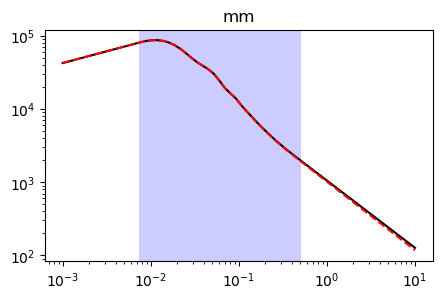

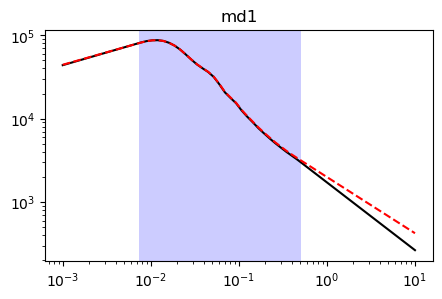

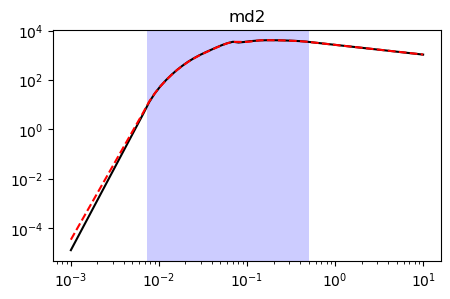

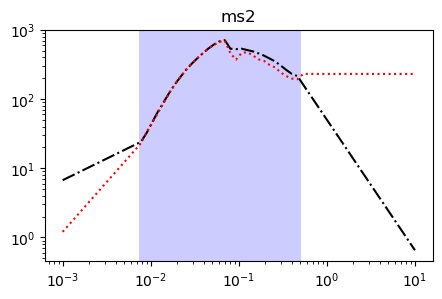

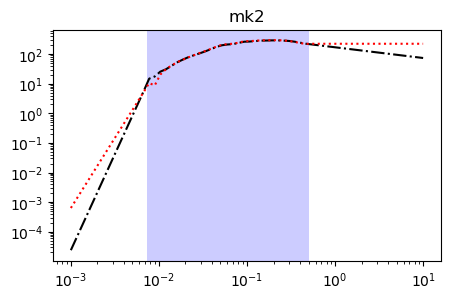

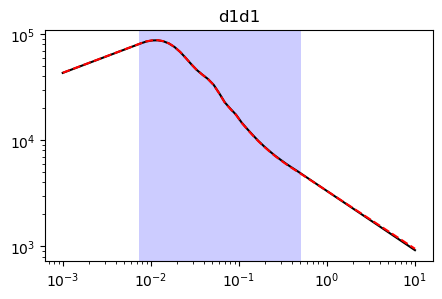

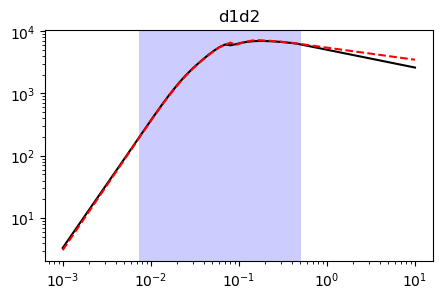

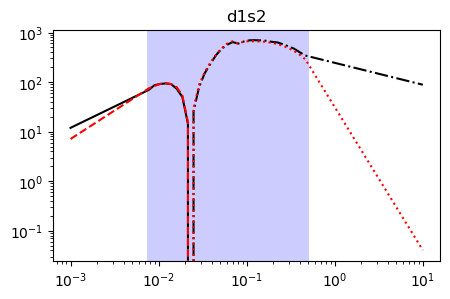

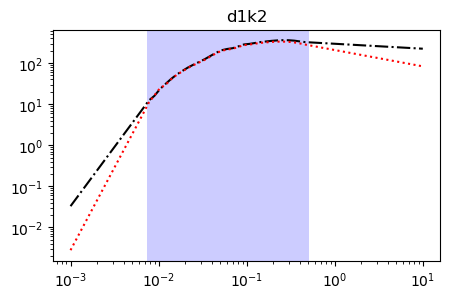

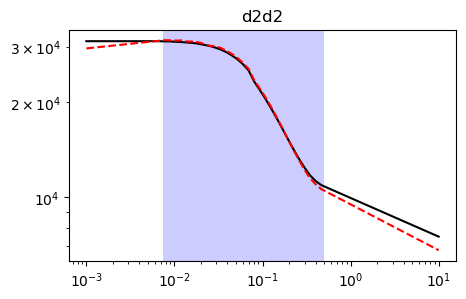

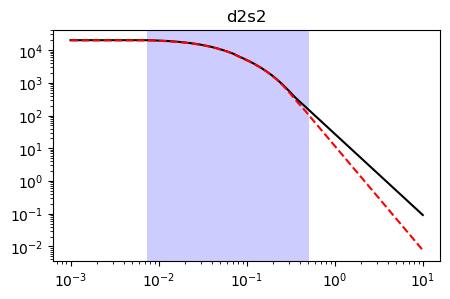

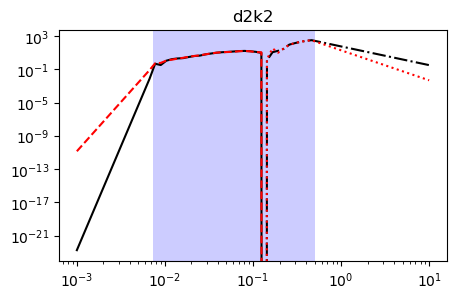

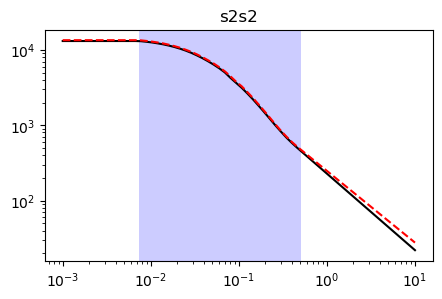

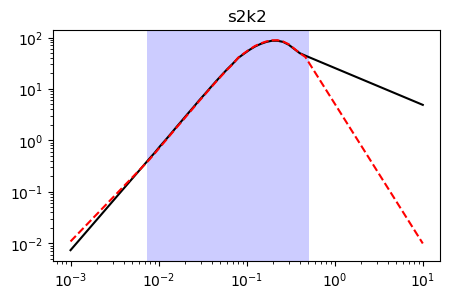

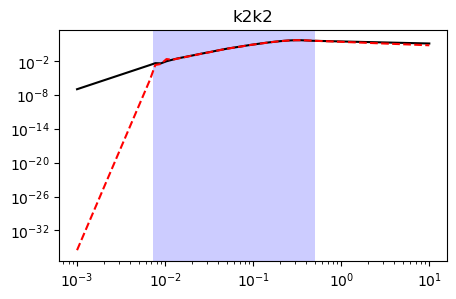

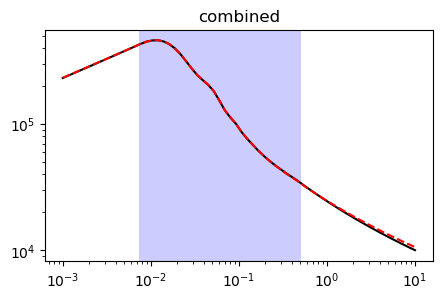

In [7]:
# Check upwards extrapolation in sigma8
lbias_bounds = get_bounds()
# Exact calculation
cosmo = ccl.Cosmology(Omega_c=0.25, Omega_b=0.05, h=0.7, n_s=0.96, sigma8=0.88)
pks_exact = get_lbias_pks(cosmo)
pk_exact = combine_pk(1.6, pks_exact)

# Extrapolate from 0.76 to 0.9
lbias_bounds['sigma8_cold'][1] = 0.76
pks_xtrap = get_lbias_pks(cosmo)
pk_xtrap = combine_pk(1.6, pks_xtrap)

ia = 0

for nm, i in inds.items():
    plt.figure(figsize=(5, 3))
    plt.title(nm)
    plt.plot(k_ccl, pks_exact[i, ia], 'k-')
    plt.plot(k_ccl, pks_xtrap[i, ia], 'r--')
    plt.plot(k_ccl, -pks_exact[i, ia], 'k-.')
    plt.plot(k_ccl, -pks_xtrap[i, ia], 'r:')
    plt.loglog()
    plt.axvspan(kh_bacco[0]*cosmo['h'],
                kh_bacco[-1]*cosmo['h'],
                facecolor='b', alpha=0.2)

plt.figure(figsize=(5, 3))
plt.title("combined")
plt.plot(k_ccl, pk_exact[ia], 'k-')
plt.plot(k_ccl, pk_xtrap[ia], 'r--')
plt.plot(k_ccl, -pk_exact[ia], 'k-.')
plt.plot(k_ccl, -pk_xtrap[ia], 'r:')
plt.loglog()
plt.axvspan(kh_bacco[0]*cosmo['h'],
            kh_bacco[-1]*cosmo['h'],
            facecolor='b', alpha=0.2)

Extrapolating sigma8_cold, 0.7498099186171244, 0.88


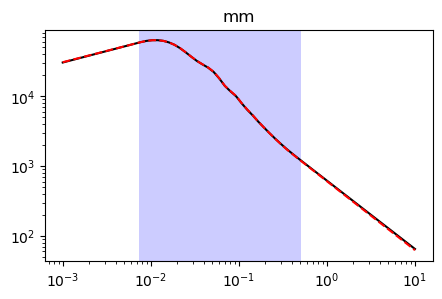

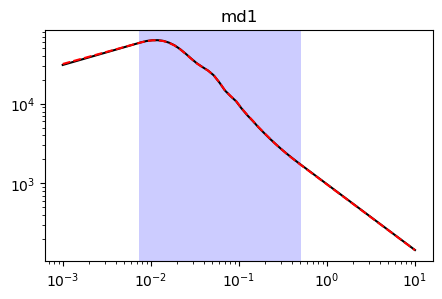

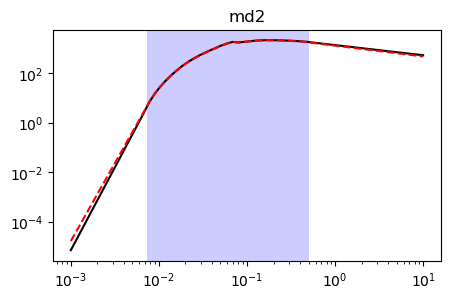

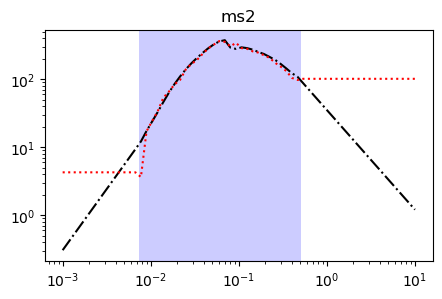

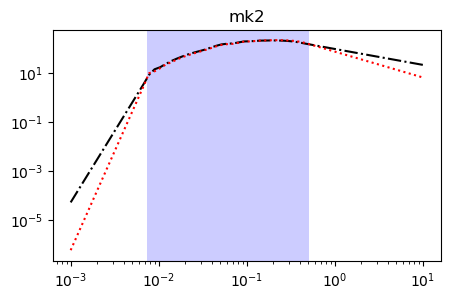

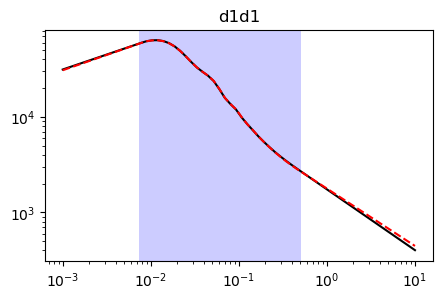

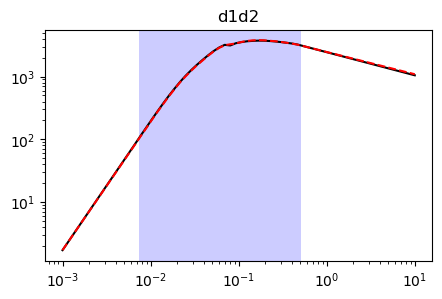

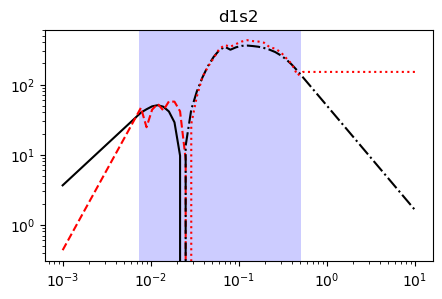

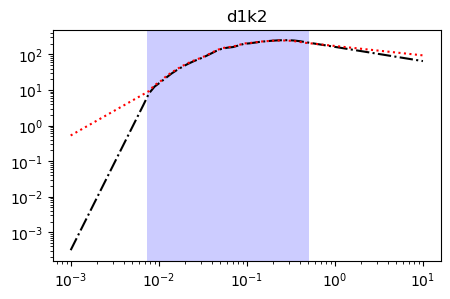

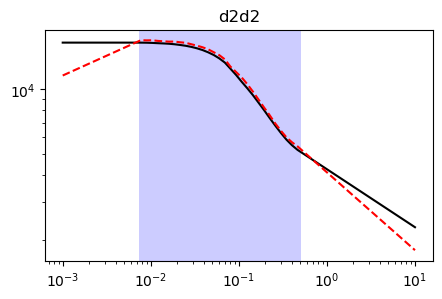

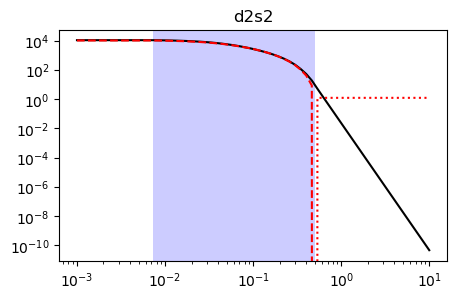

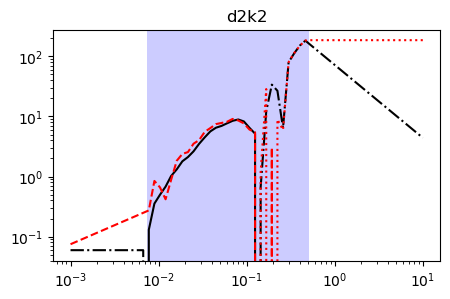

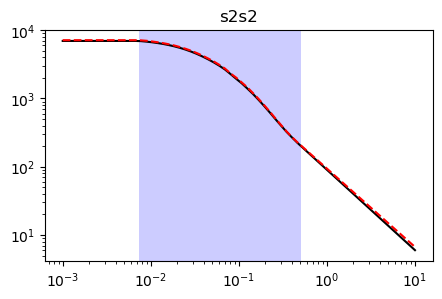

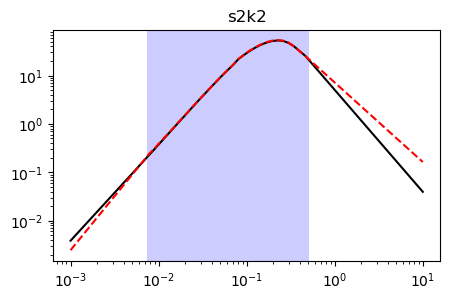

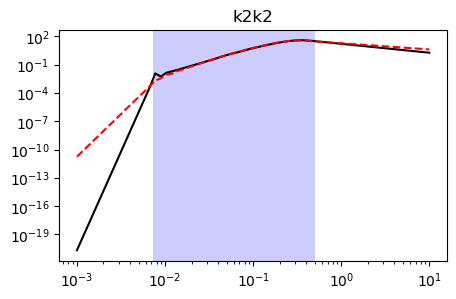

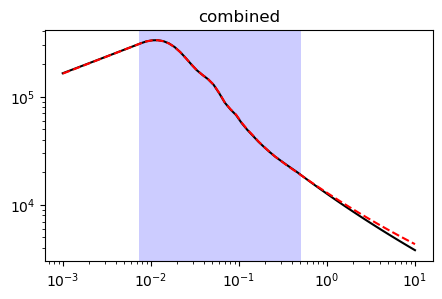

In [8]:
# Check downwards extrapolation in sigma8
lbias_bounds = get_bounds()
# Exact calculation
cosmo = ccl.Cosmology(Omega_c=0.25, Omega_b=0.05, h=0.7, n_s=0.96, sigma8=0.75)
pks_exact = get_lbias_pks(cosmo)
pk_exact = combine_pk(1.6, pks_exact)

# Extrapolate from 0.87 to 0.75
lbias_bounds['sigma8_cold'][0] = 0.87
pks_xtrap = get_lbias_pks(cosmo)
pk_xtrap = combine_pk(1.6, pks_xtrap)

ia = 0

for nm, i in inds.items():
    plt.figure(figsize=(5, 3))
    plt.title(nm)
    plt.plot(k_ccl, pks_exact[i, ia], 'k-')
    plt.plot(k_ccl, pks_xtrap[i, ia], 'r--')
    plt.plot(k_ccl, -pks_exact[i, ia], 'k-.')
    plt.plot(k_ccl, -pks_xtrap[i, ia], 'r:')
    plt.loglog()
    plt.axvspan(kh_bacco[0]*cosmo['h'],
                kh_bacco[-1]*cosmo['h'],
                facecolor='b', alpha=0.2)

plt.figure(figsize=(5, 3))
plt.title("combined")
plt.plot(k_ccl, pk_exact[ia], 'k-')
plt.plot(k_ccl, pk_xtrap[ia], 'r--')
plt.plot(k_ccl, -pk_exact[ia], 'k-.')
plt.plot(k_ccl, -pk_xtrap[ia], 'r:')
plt.loglog()
plt.axvspan(kh_bacco[0]*cosmo['h'],
            kh_bacco[-1]*cosmo['h'],
            facecolor='b', alpha=0.2)

Extrapolating omega_cold, 0.39, 0.241


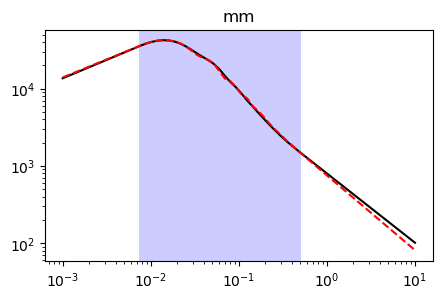

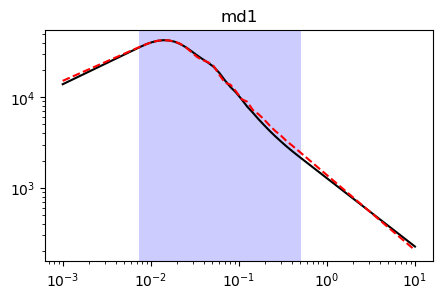

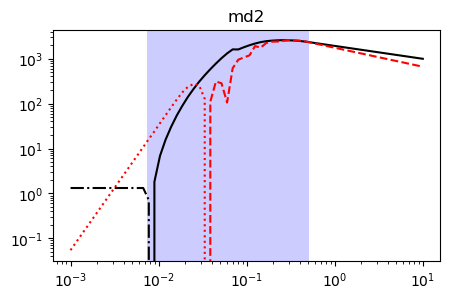

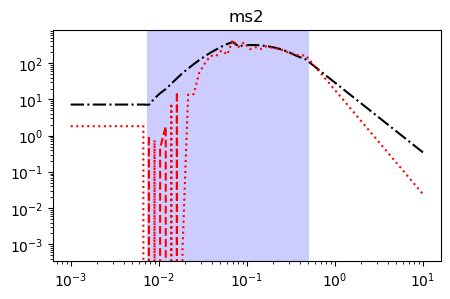

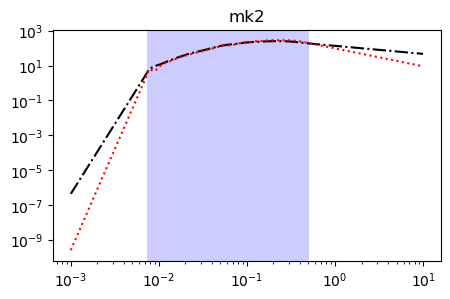

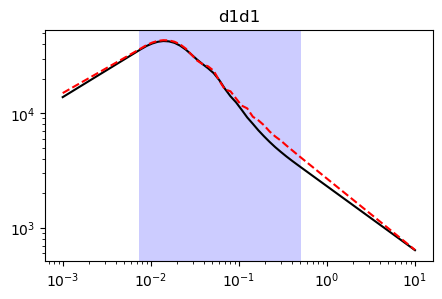

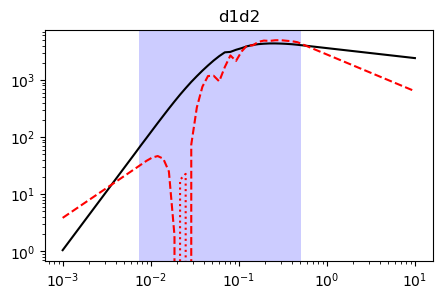

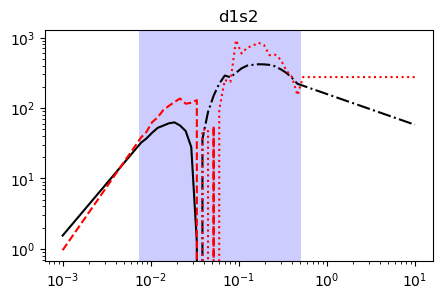

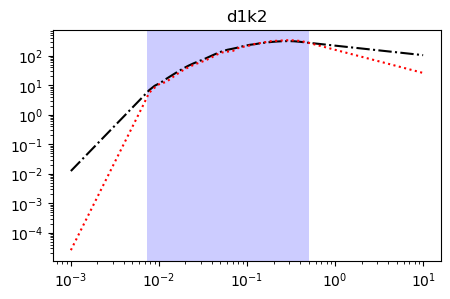

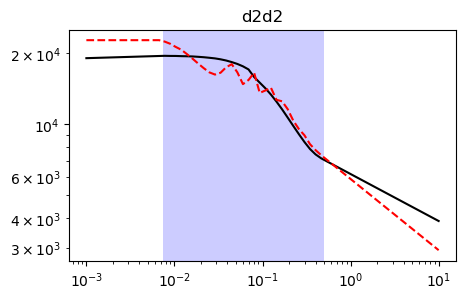

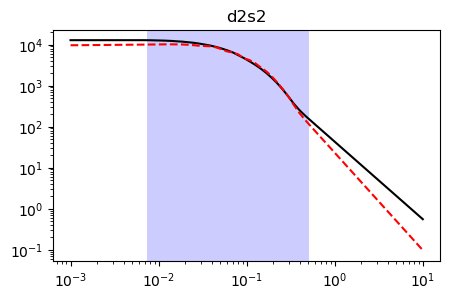

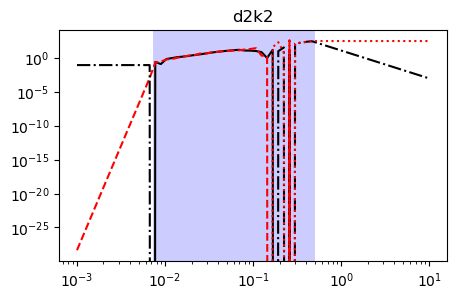

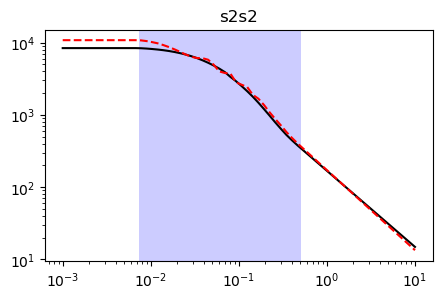

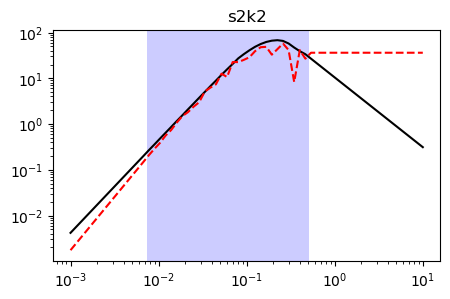

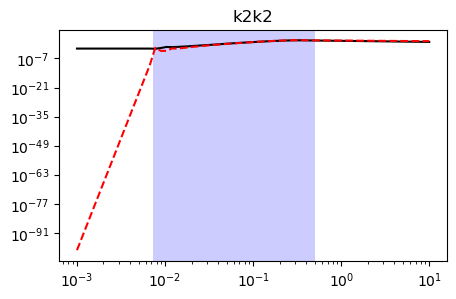

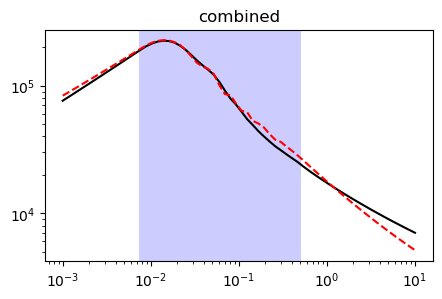

In [9]:
# Check upwards extrapolation in Omega_m
lbias_bounds = get_bounds()
Om = 0.39
Oc = Om-0.05
Ob = 0.05
#Oc = Om * 0.25/0.3
#Ob = Om * 0.05/0.3
# Exact calculation
cosmo = ccl.Cosmology(Omega_c=Oc, Omega_b=Ob, h=0.7, n_s=0.96, sigma8=0.8)
pks_exact = get_lbias_pks(cosmo)
pk_exact = combine_pk(1.6, pks_exact)

# Extrapolate from 0.25 to 0.39
lbias_bounds['omega_cold'][1] = 0.251
pks_xtrap = get_lbias_pks(cosmo)
pk_xtrap = combine_pk(1.6, pks_xtrap)

ia = 0

for nm, i in inds.items():
    plt.figure(figsize=(5, 3))
    plt.title(nm)
    plt.plot(k_ccl, pks_exact[i, ia], 'k-')
    plt.plot(k_ccl, pks_xtrap[i, ia], 'r--')
    plt.plot(k_ccl, -pks_exact[i, ia], 'k-.')
    plt.plot(k_ccl, -pks_xtrap[i, ia], 'r:')
    plt.loglog()
    plt.axvspan(kh_bacco[0]*cosmo['h'],
                kh_bacco[-1]*cosmo['h'],
                facecolor='b', alpha=0.2)

plt.figure(figsize=(5, 3))
plt.title("combined")
plt.plot(k_ccl, pk_exact[ia], 'k-')
plt.plot(k_ccl, pk_xtrap[ia], 'r--')
plt.plot(k_ccl, -pk_exact[ia], 'k-.')
plt.plot(k_ccl, -pk_xtrap[ia], 'r:')
plt.loglog()
plt.axvspan(kh_bacco[0]*cosmo['h'],
            kh_bacco[-1]*cosmo['h'],
            facecolor='b', alpha=0.2)

Extrapolating omega_cold, 0.24, 0.36


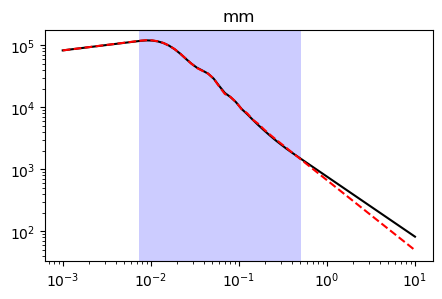

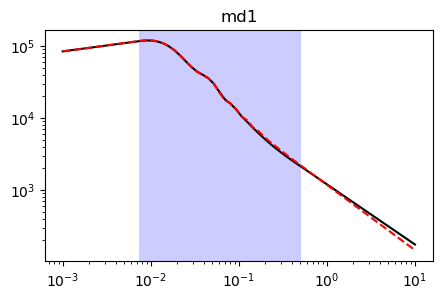

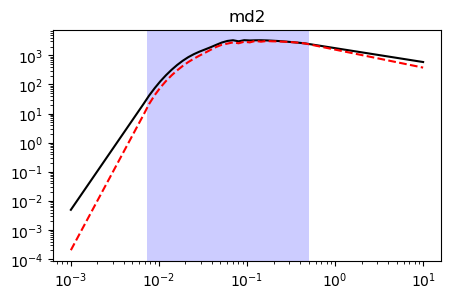

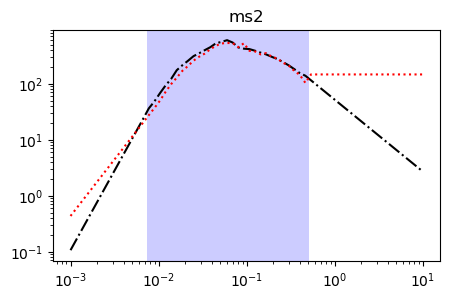

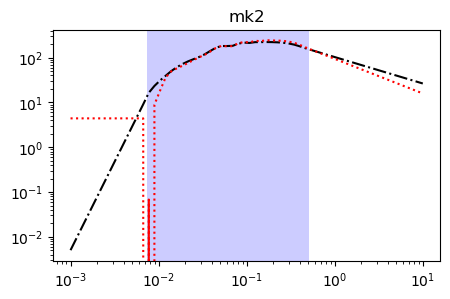

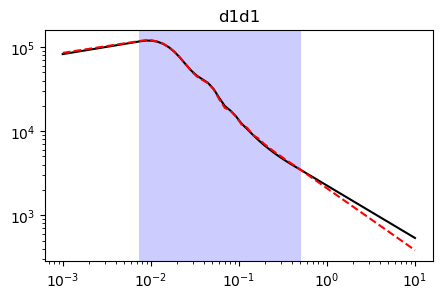

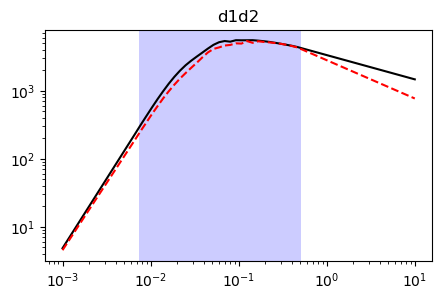

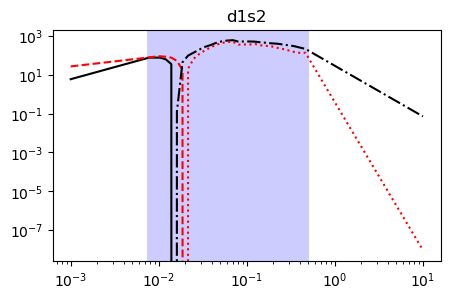

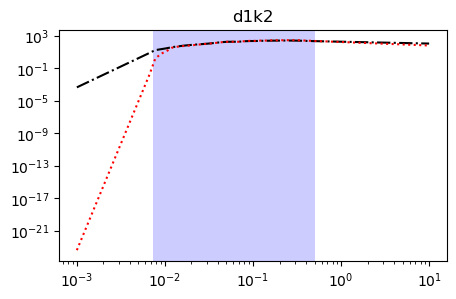

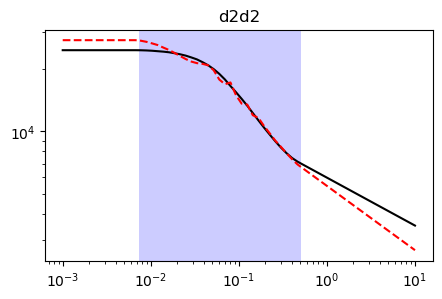

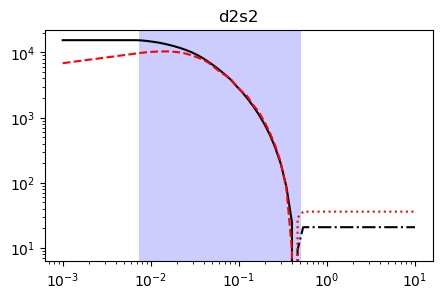

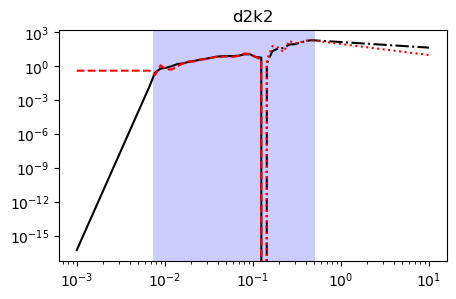

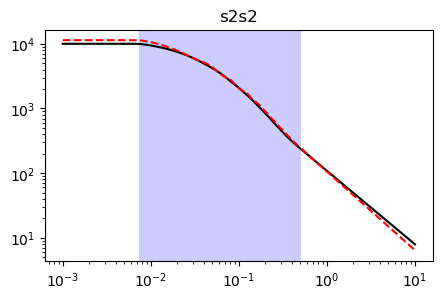

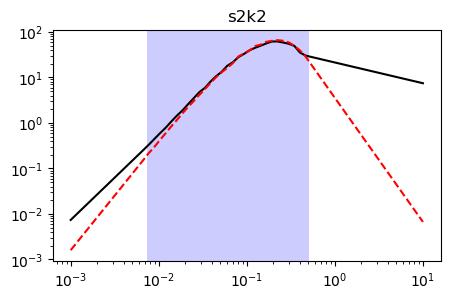

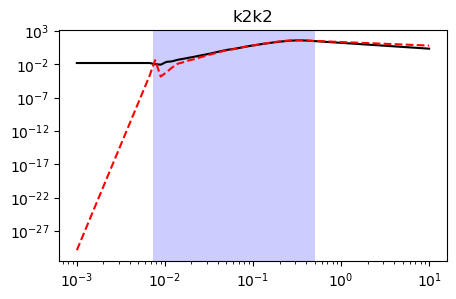

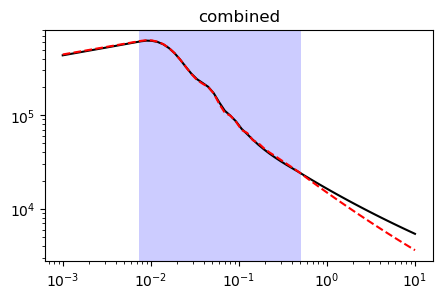

In [10]:
# Check downwards extrapolation in Omega_m
lbias_bounds = get_bounds()
Om = 0.24
Oc = Om-0.05
Ob = 0.05
#Oc = Om * 0.25/0.3
#Ob = Om * 0.05/0.3
# Exact calculation
cosmo = ccl.Cosmology(Omega_c=Oc, Omega_b=Ob, h=0.7, n_s=0.96, sigma8=0.8)
pks_exact = get_lbias_pks(cosmo)
pk_exact = combine_pk(1.6, pks_exact)

# Extrapolate from 0.35 to 0.25
lbias_bounds['omega_cold'][0] = 0.35
pks_xtrap = get_lbias_pks(cosmo)
pk_xtrap = combine_pk(1.6, pks_xtrap)

ia = 0

for nm, i in inds.items():
    plt.figure(figsize=(5, 3))
    plt.title(nm)
    plt.plot(k_ccl, pks_exact[i, ia], 'k-')
    plt.plot(k_ccl, pks_xtrap[i, ia], 'r--')
    plt.plot(k_ccl, -pks_exact[i, ia], 'k-.')
    plt.plot(k_ccl, -pks_xtrap[i, ia], 'r:')
    plt.loglog()
    plt.axvspan(kh_bacco[0]*cosmo['h'],
                kh_bacco[-1]*cosmo['h'],
                facecolor='b', alpha=0.2)

plt.figure(figsize=(5, 3))
plt.title("combined")
plt.plot(k_ccl, pk_exact[ia], 'k-')
plt.plot(k_ccl, pk_xtrap[ia], 'r--')
plt.plot(k_ccl, -pk_exact[ia], 'k-.')
plt.plot(k_ccl, -pk_xtrap[ia], 'r:')
plt.loglog()
plt.axvspan(kh_bacco[0]*cosmo['h'],
            kh_bacco[-1]*cosmo['h'],
            facecolor='b', alpha=0.2)